In [9]:
import torch
import torch.nn
from torch.autograd import Variable
import torch.optim
import torch.utils.data
import matplotlib.pyplot as plt


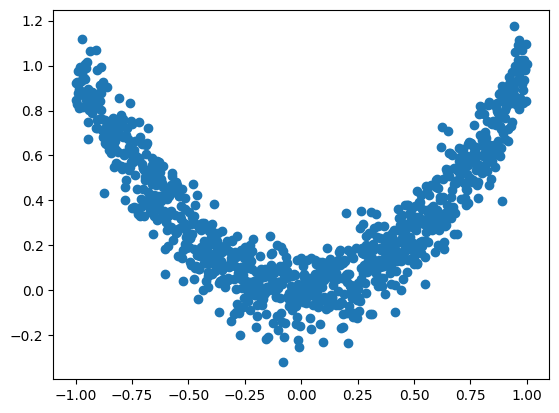

In [10]:
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y = x.pow(2) + 0.1 * torch.normal(mean=torch.zeros(*x.size()), std = 1)

plt.scatter(x,y)
plt.show()

In [11]:
# Data

torch_dataset = torch.utils.data.TensorDataset(x,y)
loader = torch.utils.data.DataLoader(dataset = torch_dataset,
                                 batch_size = 32,
                                 shuffle = True, num_workers = 2,)

In [12]:
## NN

class Net(torch.nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.hidden = torch.nn.Linear(1,20)
      self.predict = torch.nn.Linear(20,1)

    def forward(self, x):
      x = torch.nn.functional.relu(self.hidden(x))
      x = self.predict(x)
      return x

In [24]:
model = Net()
opt = torch.optim.Adam(model.parameters(), lr = 0.01, betas=(0.9,0.99))
loss_func = torch.nn.MSELoss()
losses = []

In [25]:


# Training
for epoch in range(12):
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        output = model(b_x)
        loss = loss_func(output, b_y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.detach().numpy())

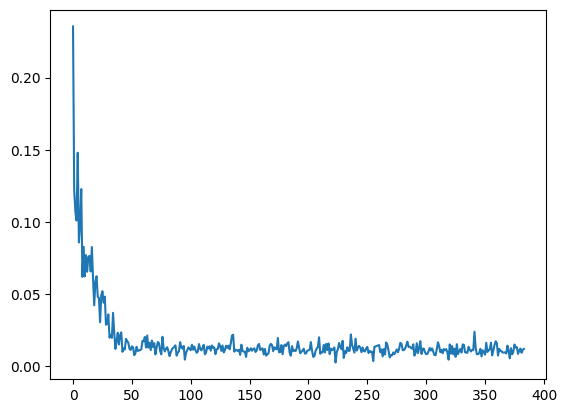

In [26]:

plt.plot(losses, label='Adam')
plt.show()